In [ ]:
# Here are the libraries that we used in order to perform Exploratory data analysis.
import pandas as pd
import pandas_profiling
import numpy as np
from numpy import asarray
from PIL import Image
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize,punkt
import spacy
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
from wordcloud import WordCloud, STOPWORDS
import matplotlib.ticker as ticker
import plotly.express as px
import regex as re
%matplotlib inline


## Exploratory Data Analysis 
This Data set is about songs from Spotify with their popularity rating and more information about the songs.

---

The data-set can be downloaded from Kaggle. The original data set contains more of 18, 000 rows and 25 columns that contains features of the songs such as lyrics, loudness, length and many more, you can check the meaning of the columns we decided to work on - below. 
This project explores and analyzes the data. The questions that led us were:

* To try check if there is a connection between the characteristics of the songs and their popularity, can we predict which characteristics will bring high popularity of the song ?
* What's the difference or effect (if there is) between the years of the songs and to the popularity ?
* Analysis of the lyrics and duration songs by genre - to see if they are different or are they the same.

## **The dataset includes many different measures on songs**

**importent ones are:**

**Acousticness**: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.

**Speechiness**: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.

**Energy**: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.

**Danceability**: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.

**Valence**: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

**track_popularity:** A measure from 0 to 100, calculated on the total number of plays


### Loading the data
Loading the data into a Data Frame and showing the top 3 rows and the botton 3 rows.

In [ ]:
sp = pd.read_csv('/content/spotify_songs.csv', engine='python')

In [ ]:
sp.head(3)

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,rock,classic rock,0.682,0.401,2,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,rock,hard rock,0.303,0.880,9,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,r&b,new jack swing,0.845,0.652,6,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en


In [ ]:
sp.tail(3)                    

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
18451,7zye9v6B785eFWEFYs13C2,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,1xdgLmTFMSyJyI5DJOOX7T,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,5EMARioe9z9eKOeWIAC2JW,r&b,neo soul,0.458,0.540,5,-6.457,0,0.0270,0.715,0.000428,0.115,0.657,142.218,191205,en
18452,7zyLObYw4QUKQDyZOb4J0Y,I'll Do 4 U (Re-Recorded / Remastered),Father MC,(Would you do for me) Sweetheart (Would you do...,36,14HYMxFhpgDIr9cci1u0kt,I'll Do 4 U (Re-Recorded / Remastered),2010-10-01,New Jack Swing/ R&B Hits: 1987 - 2002,4sji14lrB5bgcr51lPALYH,r&b,new jack swing,0.832,0.666,1,-4.920,0,0.0633,0.143,0.000000,0.072,0.810,109.536,223890,en
18453,7zzZmpw8L66ZPjH1M6qmOs,Migraine,Moonstar88,"Oo nga pala, hindi nga pala tayo Hanggang dito...",61,4t3FtECyV1gClHmpBhXSfB,When I Met You,2008-07-28,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,rock,classic rock,0.664,0.537,2,-6.000,1,0.0290,0.217,0.000003,0.118,0.221,115.049,267960,tl


### Checking the types of columns
Viewing and checking the types of data.
sometimes they not in the right type. we can see that the date columns not in datetime type and we will need to change it.

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

### **Data pre-processing**
**Check the columns and dropping unrelevant columns**
* We decide to drop the unrelevant columns - track_id, track_album_id, playlist_id, Key, Mode, liveness.
  they won't give us important information for the analysis.
* Also change some of the columns name so it will be more comftorble to work on the data.
* We will work only on songs in English cause this the main, so we drop the other languages.
* Since the data set contain popularity  from 0-100 and After we found that a rating score above 50 was considered excellent, we decided to leave only songs above a score of 50 in the data in popularity.


In [ ]:
sp.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [ ]:
sp.drop(columns = ['track_id' , 'track_album_id', 'playlist_id','key', 'mode','liveness'] , inplace= True) 

In [ ]:
sp = sp.rename(columns={'track_album_release_date': 'album_date', 'duration_ms': "track_length"})

In [ ]:
sp['language'].value_counts().nlargest(10)
sp = sp[sp['language'] == 'en']

In [ ]:
sp = sp[sp['track_popularity'] >= 50]

In [ ]:
sp['album_date'] = pd.to_datetime(sp['album_date'])
# we add a new column contain only month to make analysis on this data later
sp['month'] = sp['album_date'].apply(lambda x : x.month)

In [ ]:
# we add a new column contain decade to make analysis on this data later
sp['album_date'] = pd.to_datetime(sp['album_date']).dt.strftime('%Y')
sp['album_date'] = pd.to_numeric(sp['album_date'])
sp["decade"] = sp['album_date'] - (sp['album_date']%10)

**Checkig null and duplicated rows**

In [ ]:
sp.duplicated().sum()

0

In [ ]:
sp.isna().sum().any()

False

**View the final shape and data frame after the changes and we can see the changes updated correct.**

In [ ]:
a,b = sp.shape
print(f'Our data contain {a} rows and {b} columns.')

Our data contain 7022 rows and 21 columns.


### **Statistics on the data**

In [ ]:
round(sp.describe(),2)

,track_popularity,album_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_length,month,decade
count,7022.00,7022.00,7022.00,7022.00,7022.00,7022.00,7022.00,7022.00,7022.00,7022.00,7022.00,7022.00,7022.00
mean,63.72,2008.48,0.63,0.68,-6.73,0.10,0.18,0.03,0.51,120.93,226074.04,5.88,2002.56
std,9.25,13.52,0.15,0.18,2.87,0.10,0.22,0.13,0.23,27.30,52986.43,3.78,12.72
min,50.00,1957.00,0.13,0.02,-24.64,0.02,0.00,0.00,0.00,37.11,66786.00,1.00,1950.00
25%,56.00,2003.00,0.53,0.55,-8.15,0.04,0.02,0.00,0.34,99.98,192000.00,2.00,2000.00
50%,63.00,2015.00,0.65,0.70,-6.17,0.06,0.08,0.00,0.50,120.06,218708.50,6.00,2010.00
75%,70.00,2018.00,0.74,0.82,-4.73,0.12,0.25,0.00,0.68,136.08,252240.00,9.00,2010.00
max,100.00,2020.00,0.98,1.00,-0.57,0.92,0.99,0.97,0.99,212.14,517125.00,12.00,2020.00


**A list of 10 songs with the highest popularity score**

We can see that 8 from top 10 songs are from the pop genre.


In [ ]:
#@title
most_songs = sp.query('track_popularity>94', inplace=False).sort_values('track_popularity', ascending=False)
most_songs.index = range(1,12)
most_songs[['track_name' , 'track_popularity', 'playlist_genre']].head(10)#.to_markdown(tablefmt="grid")

,track_name,track_popularity,playlist_genre
1,Dance Monkey,100,pop
2,ROXANNE,99,latin
3,The Box,98,rap
4,Blinding Lights,98,pop
5,Circles,98,pop
6,Memories,98,pop
7,everything i wanted,97,pop
8,Falling,97,pop
9,Don't Start Now,97,pop
10,bad guy,95,pop


**The most frequently featured artists on the playlists**

From a quick look at the leading singers we can see all types of genres.

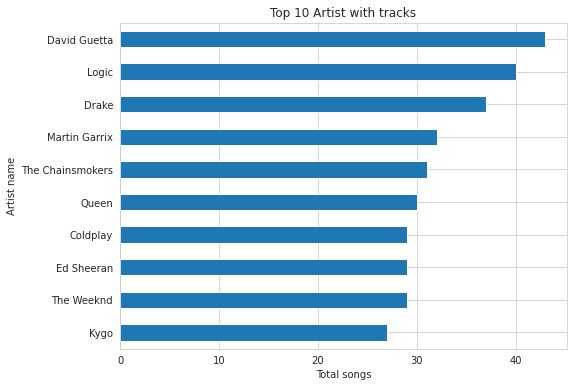

In [ ]:
plt.figure(figsize=(8,6))
sp.groupby('track_artist')['track_name'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh')
plt.title("Top 10 Artist with tracks")
plt.ylabel('Artist name')
plt.xlabel('Total songs')
plt.show()

**Amount of tracks in each genre**

In [ ]:
#@title
sp['playlist_genre'].value_counts()


pop      2146
rock     1662
r&b      1261
rap      1114
edm       482
latin     357
Name: playlist_genre, dtype: int64

**Amount of tracks in each sub_genre**

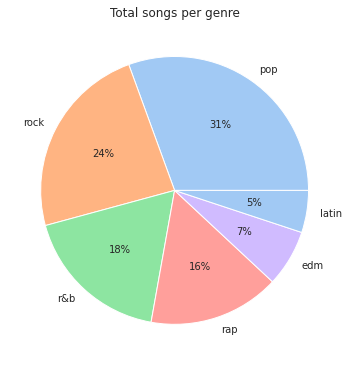

In [ ]:
#@title
data = sp.playlist_genre.value_counts().tolist()
labels = ['pop', 'rock', 'r&b', 'rap', 'edm', 'latin']
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Total songs per genre')
plt.show()

In [ ]:
#@title
genere_group = sp.groupby(["playlist_genre","playlist_subgenre"]).size()
genere_group

playlist_genre  playlist_subgenre        
edm             big room                      57
                electro house                151
                pop edm                      177
                progressive electro house     97
latin           latin hip hop                157
                latin pop                     80
                reggaeton                      9
                tropical                     111
pop             dance pop                    540
                electropop                   424
                indie poptimism              563
                post-teen pop                619
r&b             hip pop                      255
                neo soul                     290
                new jack swing               148
                urban contemporary           568
rap             gangster rap                 250
                hip hop                      385
                southern hip hop             362
                trap       


**different music genres in the data and the different subgenres in each of the decade**

In [ ]:
#@title
decade_genere_group = sp.groupby(["decade","playlist_genre","playlist_subgenre"]).size()
decade_genere_group

decade  playlist_genre  playlist_subgenre 
1950    r&b             urban contemporary     1
        rock            classic rock           1
1960    pop             post-teen pop          1
        r&b             neo soul               3
                        urban contemporary     6
                                              ..
2020    r&b             urban contemporary     1
        rap             hip hop               26
        rock            classic rock           1
                        hard rock              8
                        permanent wave         3
Length: 113, dtype: int64

### Features Analysis
In this heat map we try to find the relationship between the features tracks .In the below heat map we can see positive connection between energy and loudness. 
But the obvious thing is that we see that there is no connection between the other features songs.

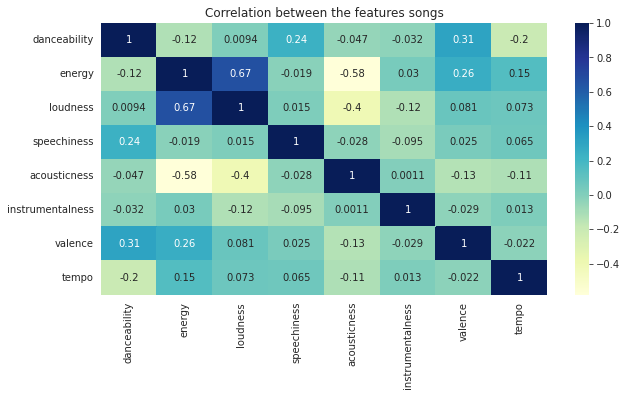

In [ ]:
#@title
# Plotting a heat map for corr Correlation between the features songs
cor_track  = sp[['danceability', 'energy', 'loudness','speechiness',
       'acousticness', 'instrumentalness', 'valence', 'tempo']]
plt.figure(figsize=(10,5))
c= cor_track.corr()
sns.heatmap(c,cmap='YlGnBu',annot=True).set(title='Correlation between the features songs')
plt.show()

In this chart we compare the characteristics of the songs over the years, it can be said that songs stay high in characteristics of danceability and energy. 
while acousticness remain low and keeped going down it's can be connection that natural sounds contribute to acousticness and with the years singers using more other production features and voice effects that affect that.
It can be seen that there is also a decline in songs valence over the years.

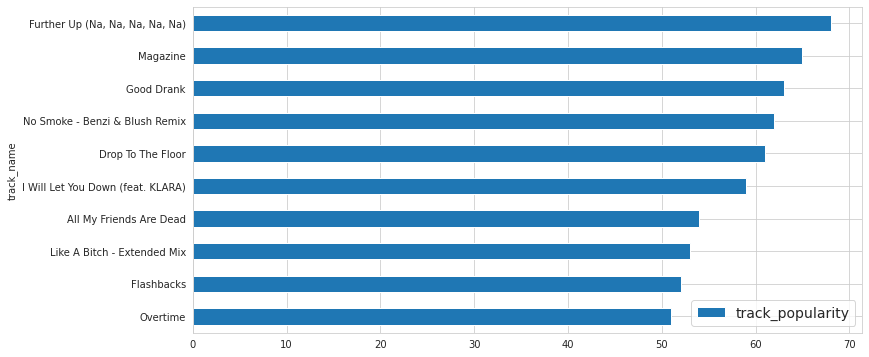

In [ ]:
sp.sort_values(['loudness', 'energy'], axis = 0, ascending = [False,False]).head(10)[["track_name","track_artist","track_popularity"]]\
.sort_values(by = "track_popularity" ).set_index("track_name").plot(kind = "barh",figsize=(12,6))
plt.legend(fontsize = 14)
plt.show()

In [ ]:
#@title
avg_popularity_by_loudnes_energy = sp.sort_values(['loudness', 'energy'], axis = 0, ascending = [False,False]).head(10)["track_popularity"].mean()
print(f' The avg popularity of the sonngs with the top loudnes and energy is {avg_popularity_by_loudnes_energy}')

 The avg popularity of the sonngs with the top loudnes and energy is 58.8


**features over the dacades**

In [ ]:
#@title
deaced_avg = sp[['danceability','energy','acousticness','valence','decade']].groupby('decade').mean().sort_values(by='decade').reset_index()
deaced_avg

,decade,danceability,energy,acousticness,valence
0,1950,0.606000,0.772000,0.423500,0.910500
1,1960,0.499884,0.601739,0.296636,0.592464
2,1970,0.557783,0.631756,0.236549,0.635859
3,1980,0.594245,0.702858,0.146383,0.624974
4,1990,0.643095,0.671923,0.136428,0.574553
5,2000,0.609461,0.726981,0.141428,0.561309
6,2010,0.650463,0.671492,0.184493,0.463077
7,2020,0.666685,0.637757,0.201485,0.435183


We can see that in our data over the decades data the songs became more danceable but genraly less happy sounds and less acoustic and with lower enregy

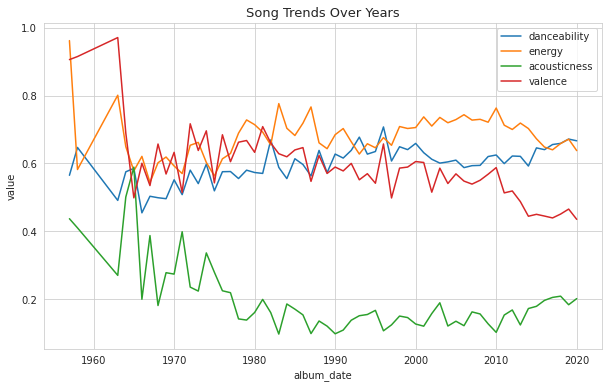

In [ ]:
#@title
# Song Trends Over Time
year_avg = sp[['danceability','energy','acousticness','valence','album_date']].groupby('album_date').mean().sort_values(by='album_date').reset_index()
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
lines = ['danceability','energy','acousticness','valence']
for line in lines:
    ax = sns.lineplot( x='album_date',y=line, data=year_avg)
# lineplot.index = 'album_date'
plt.legend(lines)
ax.set_xlim()
plt.ylabel("value")
plt.title("Song Trends Over Years", fontsize=13)
plt.show()

In this chart we can see the genre that lead in each featuer.

We can see that most of the genres have high characteristics of danceability and energy.
also we can say that speechiness and instrumentalness are strong in rap and edm genre's and they are not in top genre.

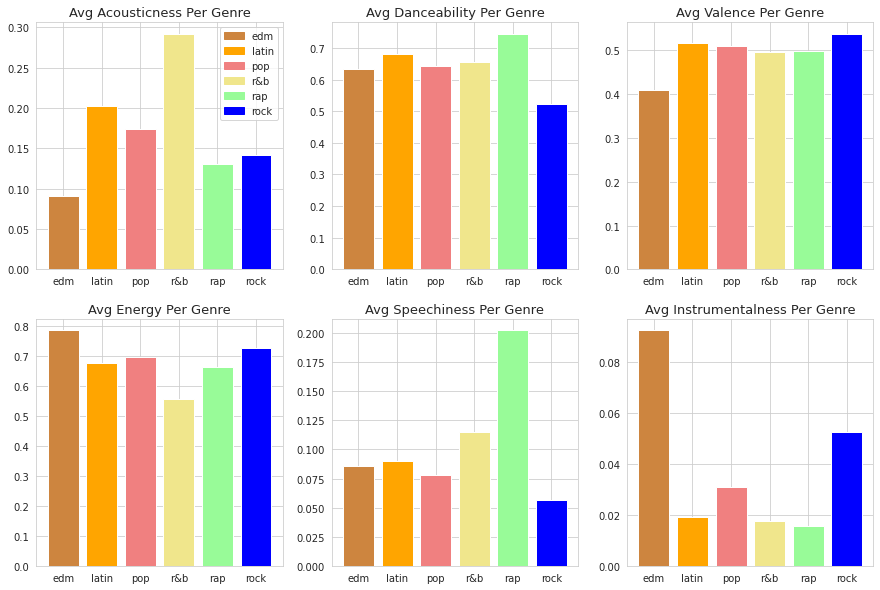

In [ ]:
#@title
features = sp[['playlist_genre','danceability', 'energy', 'speechiness', 'acousticness','instrumentalness','valence']]
f = pd.DataFrame(features.groupby('playlist_genre').mean())
f.reset_index("playlist_genre", inplace = True)
palete = {'edm':'peru', 'latin':'orange', 'pop':'lightcoral', 'r&b':'khaki', 'rap':'palegreen','rock':'blue'}
labels = list(palete.keys())

fig, ax = plt.subplots(2, 3, figsize = (15, 10))
ax[0, 0].bar(f['playlist_genre'], f["acousticness"], color=palete.values())
ax[0, 0].set_title("Avg Acousticness Per Genre", fontsize = 13)
ax[0, 1].bar(f['playlist_genre'], f["danceability"], color=palete.values())
ax[0, 1].set_title("Avg Danceability Per Genre", fontsize = 13)
ax[0, 2].bar(f['playlist_genre'], f["valence"], color=palete.values())
ax[0, 2].set_title("Avg Valence Per Genre", fontsize = 13)
ax[1, 0].bar(f['playlist_genre'], f["energy"], color=palete.values())
ax[1, 0].set_title("Avg Energy Per Genre", fontsize = 13)
ax[1, 1].bar(f['playlist_genre'], f["speechiness"], color=palete.values())
ax[1, 1].set_title("Avg Speechiness Per Genre", fontsize = 13)
ax[1, 2].bar(f['playlist_genre'], f["instrumentalness"], color=palete.values())
ax[1, 2].set_title("Avg Instrumentalness Per Genre", fontsize = 13)
handles = [plt.Rectangle((0,0),1,1, color=palete[l]) for l in labels]
ax[0, 0].legend(handles, labels)
plt.show()

Here we want to check if there is an effect of the release date of the song with the popularity, we can see that songs released in December have gained high popularity compared to the other months but not by a big margin.

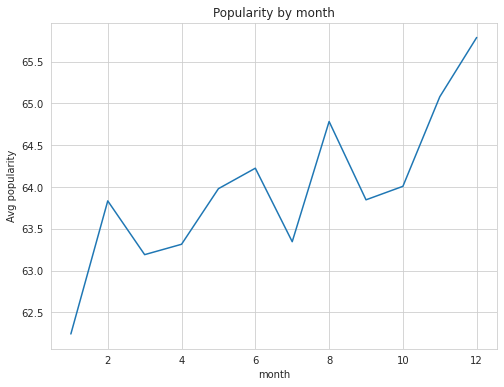

In [ ]:
#@title
sp.groupby('month')['track_popularity'].mean().plot.line(figsize = (8, 6))
sns.set_style('whitegrid')
plt.title('Popularity by month')
plt.ylabel('Avg popularity')
plt.show()

### **Genere Anaysis**

The genre that has the most songs with popularity over 50 is pop.

Here we can see the songs by genre type over the years.
The songs that have come out in recent years and are leading in rank of popularity are from the pop genre compared to previous years that rock was higher.

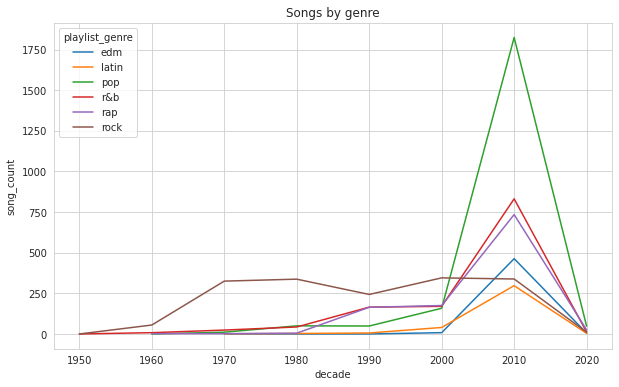

In [ ]:
#@title
genre_list = sp.playlist_genre.value_counts().index[:10]
df_genre = sp[sp.playlist_genre.isin(genre_list)][["playlist_genre",'decade',
         'energy']].groupby(["playlist_genre",'decade']).count().reset_index()
df_genre.rename(columns={'energy':'song_count'}, inplace=True)
df_genre
plt.figure(figsize=(10,6))
sns.lineplot(x='decade', y='song_count', hue='playlist_genre', data=df_genre)
plt.title('Songs by genre')
plt.show()

Distribution of the songs length according to the genres.

Most songs are in length between 3-4 minutes,
but we can say that rock genre has quite a few songs with over 5 minutes, and we have also seen that in this genre there are few words so it can be said that these songs are characterized most by music.

                 count      mean       std  ...       50%       75%       max
playlist_genre                              ...                              
edm              482.0  3.475322  0.703164  ...  3.375717  3.778596  8.468667
latin            357.0  3.575635  0.712507  ...  3.505117  3.856450  6.736883
pop             2146.0  3.566018  0.659450  ...  3.483483  3.866613  8.069117
r&b             1261.0  3.885159  0.910900  ...  3.842667  4.378000  8.436667
rap             1114.0  3.665144  0.924837  ...  3.626050  4.248158  7.478883
rock            1662.0  4.134633  1.021199  ...  3.969000  4.589917  8.618750

[6 rows x 8 columns]


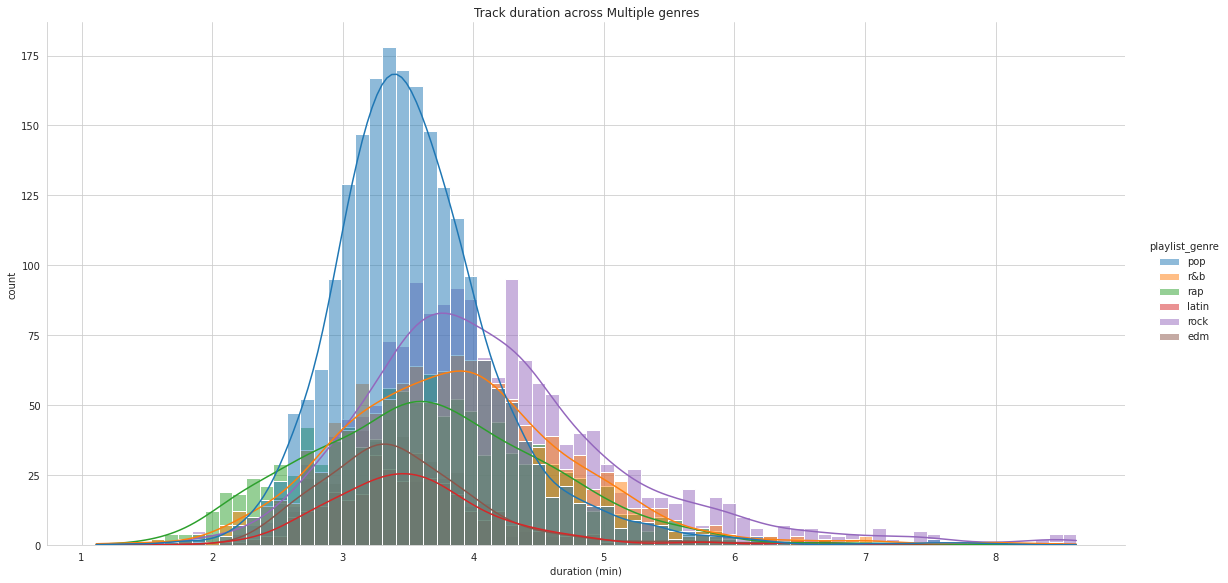

In [ ]:
#@title

new_df = sp
new_df['duration_minutes'] = new_df['track_length']/60000
print(new_df.groupby("playlist_genre")["duration_minutes"].describe())
sns.displot(new_df, x='duration_minutes', hue="playlist_genre",height = 8, aspect = 2, kde=True)
sns.set_style('white')
plt.title('Track duration across Multiple genres')
plt.xlabel('duration (min)')
plt.ylabel('count')
plt.show()

Songs according to genre and sub-genre.

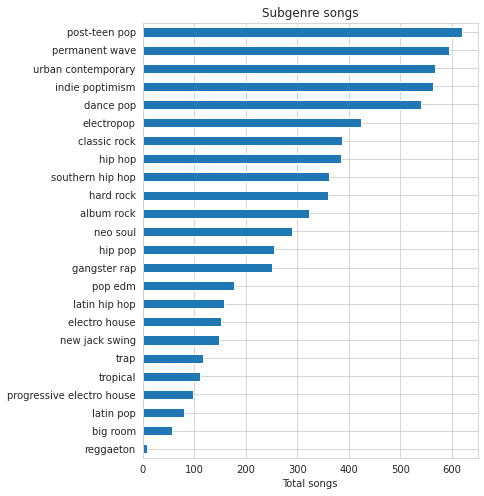

In [ ]:
#@title
# ploting in bar chart prtition by sub genre
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sp['playlist_subgenre'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(6, 8))
plt.title("Subgenre songs")
plt.xlabel('Total songs')
plt.show()

In [ ]:
#@title
artist_list = sp.track_artist.value_counts().index[:10]
artist_list
artist_list = sp.track_artist.value_counts().index[:10]
df_artists = sp[sp.track_artist.isin(artist_list)][['track_artist','album_date',
                                                        'energy']].groupby(['track_artist','album_date']).count().reset_index()
df_artists.rename(columns={'energy':'song_count'}, inplace=True)
df1 = pd.DataFrame(np.zeros((51,10)), columns=artist_list)
df1['album_date'] = np.arange(1970,2021)
df1 = df1.melt(id_vars='album_date',var_name='track_artist', value_name='song_count')
print(df1.shape)
df_merge = pd.merge(df1, df_artists, on=['album_date','track_artist'], how='outer').sort_values(by='album_date').reset_index(drop=True)
df_merge.fillna(0, inplace=True)
df_merge.drop('song_count_x', axis=1, inplace=True)
df_merge.rename(columns={'song_count_y':'song_count'}, inplace=True)
df_merge['record_sum'] = df_merge[['song_count','track_artist']].groupby('track_artist').cumsum()
fig = px.bar(df_merge,
             x='track_artist', y='record_sum',
             color='track_artist',
             animation_frame='album_date', animation_group='album_date',
             range_y=[0,50],
             title='Artists domination across years')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 'categoryarray':['David Guetta', 'Logic', 'Drake', 'Martin Garrix', 'The Chainsmokers',
       'Queen', 'The Weeknd', 'Coldplay', 'Ed Sheeran', 'Kygo']})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=400
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"]=800
fig.show()


(510, 3)


In [ ]:
#@title
genre_list = sp.playlist_genre.value_counts().index[:10]
df_genre = sp[sp.playlist_genre.isin(genre_list)][['playlist_genre','decade',
                                                        'energy']].groupby(['playlist_genre','decade']).count().reset_index()
df_genre.rename(columns={'energy':'song_count'}, inplace=True)

df1 = pd.DataFrame(np.zeros((7,6)), columns=genre_list)
df1['decade'] = np.arange(1950,2020,10)
df1 = df1.melt(id_vars='decade',var_name='playlist_genre', value_name='song_count')
df_merge = pd.merge(df1, df_genre, on=['decade','playlist_genre'], how='outer').sort_values(by='decade').reset_index(drop=True)
df_merge.fillna(0, inplace=True)
df_merge.drop('song_count_x', axis=1, inplace=True)
df_merge.rename(columns={'song_count_y':'song_count'}, inplace=True)
df_merge['genre_sum'] = df_merge[['song_count','playlist_genre']].groupby('playlist_genre').cumsum()

fig = px.bar(df_merge,
             x='playlist_genre', y='genre_sum',
             color='playlist_genre',
             animation_frame='decade', animation_group='decade',
             range_y=[0,2500],
             title='genre with Most Number of Songs by decade')

fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 'categoryarray':['pop', 'rock', 'r&b', 'rap', 'edm', 'latin']})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=900
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"]=700
fig.show()

### Lyrics songs - Text mining

We took the songs that has over 75 in the rank popularity and they are in the top 3 Genre and showed their common words in the songs.
and we can see different between them.

In [ ]:
# @title
# nltk.download('punkt')
# nltk.download('stopwords')
# from nltk.corpus import stopwords
pop_data = sp[(sp['playlist_genre'] =='pop') & (sp['track_popularity'] > 70) ].head(50)
pop_lyrics = ' '.join(pop_data['lyrics'].str.lower())
text = pop_lyrics
pop_lyrics = text.split(" ")
pop_lyrics_words = [w for w in pop_lyrics if w not in stopwords.words("english")]
unique_pop_lyrics_words = set(pop_lyrics_words)
print(f'The top 50 popular track in the pop genre have a total of \
{len(pop_lyrics_words)} words \
{len(unique_pop_lyrics_words)} unique words \
 and an avg of {len(unique_pop_lyrics_words)/50:.0f} unique words per song')


rock_data = sp[(sp['playlist_genre'] =='rock') & (sp['track_popularity'] > 70) ].head(50)
rock_lyrics = ' '.join(rock_data['lyrics'].str.lower())
text = rock_lyrics
rock_lyrics = text.split(" ")
rock_lyrics_words = [w for w in rock_lyrics if w not in stopwords.words("english")]
unique_rock_lyrics_words = set(rock_lyrics_words)
print(f'The top 50 popular track in the rock genre have a total of \
{len(rock_lyrics_words)} words, \
{len(unique_rock_lyrics_words)} unique words \
 and an avg of {len(unique_rock_lyrics_words)/50:.0f} unique words per song ')


r_n_b_data = sp[(sp['playlist_genre'] =='r&b') & (sp['track_popularity'] > 70) ].head(50)
r_n_b_lyrics = ' '.join(r_n_b_data['lyrics'].str.lower())
text = r_n_b_lyrics
r_n_b_lyrics = text.split(" ")
r_n_b_lyrics_words = [w for w in r_n_b_lyrics if w not in stopwords.words("english")]
unique_r_n_b_lyrics_words = set(r_n_b_lyrics_words)
print(f'The top 50 popular track in the r&b genre have a total of \
{len(r_n_b_lyrics_words)} words, {len(unique_r_n_b_lyrics_words)} unique words\
 an avg of {len(unique_r_n_b_lyrics_words)/50:.0f} unique words per song ')




The top 50 popular track in the pop genre have a total of 25272 words 2090 unique words  and an avg of 42 unique words per song
The top 50 popular track in the rock genre have a total of 9256 words, 1783 unique words  and an avg of 36 unique words per song 
The top 50 popular track in the r&b genre have a total of 13777 words, 2951 unique words an avg of 59 unique words per song 


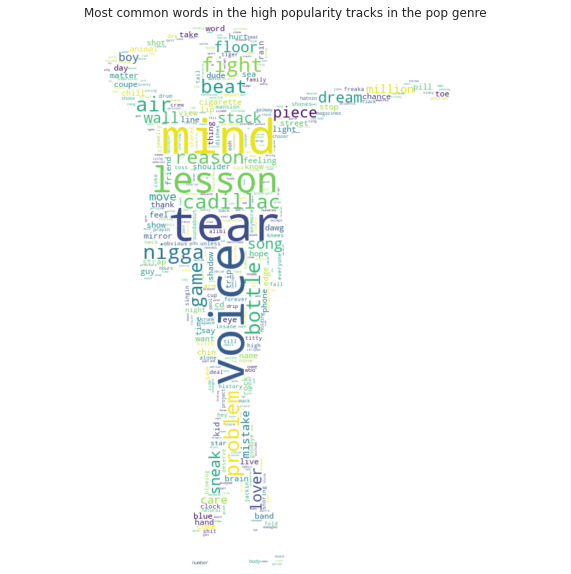

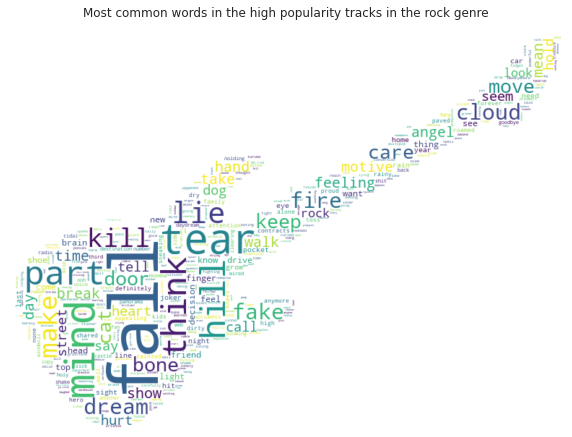

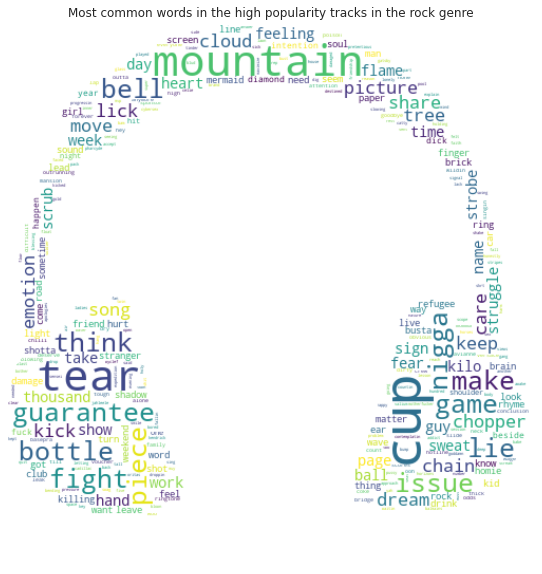

In [ ]:
#@title
pop_data = sp[(sp['playlist_genre'] =='pop') & (sp['track_popularity'] > 70) ].head(50)
pop_lyrics = ' '.join(pop_data['lyrics'].str.lower())
text = pop_lyrics
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
pop_lyrics = text.split()
pop_lyrics_words = set([w for w in pop_lyrics if w not in stopwords.words("english")])
pop_lyrics_words = ' '.join(pop_lyrics_words)
mj_mask = np.array(Image.open("/content/mj_bg.png"))
wc = WordCloud(background_color="white", max_words=10000, mask=mj_mask,
               stopwords=STOPWORDS, contour_width=1, contour_color= "white")
wc.generate(pop_lyrics_words)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.title('Most common words in the high popularity tracks in the pop genre')
plt.axis("off")
plt.show()
print()


# # showing the common words in the rock genre lyrics 
rock_data = sp[(sp['playlist_genre'] =='rock') & (sp['track_popularity'] > 70) ].head(50)
rock_lyrics = ' '.join(rock_data['lyrics'].str.lower())
text = rock_lyrics
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
rock_lyrics = text.split()
rock_lyrics_words = set([w for w in rock_lyrics if w not in stopwords.words("english")])
rock_lyrics_words = ' '.join(rock_lyrics_words)
guitar_mask = np.array(Image.open("/content/guitar image.png"))
wc = WordCloud(background_color="white", max_words=10000, mask=guitar_mask,
               stopwords=STOPWORDS, contour_width=3, contour_color= "white")
wc.generate(rock_lyrics_words)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.title('Most common words in the high popularity tracks in the rock genre')
plt.axis("off")
plt.show()
print()


r_n_b_data = sp[(sp['playlist_genre'] =='r&b') & (sp['track_popularity'] > 70) ].head(50)
r_n_b_lyrics = ' '.join(r_n_b_data['lyrics'].str.lower())
text = r_n_b_lyrics
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
r_n_b_lyrics = text.split()
r_n_b_lyrics_words = set([w for w in r_n_b_lyrics if w not in stopwords.words("english")])
r_n_b_lyrics_words = ' '.join(r_n_b_lyrics_words)
headphones_mask = np.array(Image.open("/content/headphone.jpg"))
wc = WordCloud(background_color="white", max_words=10000, mask=headphones_mask,
               stopwords=STOPWORDS, contour_width=3, contour_color= "white")
wc.generate(r_n_b_lyrics_words)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.title('Most common words in the high popularity tracks in the rock genre')
plt.axis("off")
plt.show()
print()

The amount of lyrics of the top 50 songs in the top 3 genre

In [ ]:
#@title
# counts words per song
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.corpus import stopwords
pop_data = sp[(sp['playlist_genre'] =='pop') & (sp['track_popularity'] > 70) ].head(50)
pop_lyrics = ' '.join(pop_data['lyrics'].str.lower())
text = pop_lyrics
pop_lyrics = text.split(" ")
pop_lyrics_words = [w for w in pop_lyrics if w not in stopwords.words("english")]
# print(len(set(pop_lyrics_words)))
print(f'The top 50 popular tracks in the pop genre have a total of \
{len(pop_lyrics_words)} words, an avg of {len(pop_lyrics_words)/50:.0f} words per song ')


rock_data = sp[(sp['playlist_genre'] =='rock') & (sp['track_popularity'] > 70) ].head(50)
rock_lyrics = ' '.join(rock_data['lyrics'].str.lower())
text = rock_lyrics
rock_lyrics = text.split(" ")
rock_lyrics_words = [w for w in rock_lyrics if w not in stopwords.words("english")]
# print(len(set(rock_lyrics_words)))
print(f'The top 50 popular tracks in the rock genre have a total of \
{len(rock_lyrics_words)} words, an avg of {len(rock_lyrics_words)/50:.0f} words per song ')


r_n_b_data = sp[(sp['playlist_genre'] =='r&b') & (sp['track_popularity'] > 70) ].head(50)
r_n_b_lyrics = ' '.join(r_n_b_data['lyrics'].str.lower())
text = r_n_b_lyrics
r_n_b_lyrics = text.split(" ")
r_n_b_lyrics_words = [w for w in r_n_b_lyrics if w not in stopwords.words("english")]
# print(len(set(r_n_b_lyrics_words)))
print(f'The top 50 popular tracks in the r&b genre have a total of \
{len(r_n_b_lyrics_words)} words, an avg of {len(r_n_b_lyrics_words)/50:.0f} words per song ')

The top 50 popular tracks in the pop genre have a total of 25272 words, an avg of 505 words per song 
The top 50 popular tracks in the rock genre have a total of 9256 words, an avg of 185 words per song 
The top 50 popular tracks in the r&b genre have a total of 13777 words, an avg of 276 words per song 


Working with spacy to try to find patterns in the lyrics of the songs according to the popular genres

In [ ]:
!python -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

In [ ]:
#@title
lyrics_data = sp[['playlist_genre',"lyrics","language","track_popularity"]]
pop_data = lyrics_data[lyrics_data['playlist_genre'].isin(["pop"])& (lyrics_data['track_popularity'] > 70)&(lyrics_data['language'] =='en')]
pop_data = pop_data.sort_values(by = "track_popularity",ascending = False).head(50)


rock_data = lyrics_data[lyrics_data['playlist_genre'].isin(["rock"])& (lyrics_data['track_popularity'] > 70)&(lyrics_data['language'] =='en')]
rock_data = rock_data.sort_values(by = "track_popularity",ascending = False).head(50)

r_n_b_data = lyrics_data[lyrics_data['playlist_genre'].isin(["r&b"])& (lyrics_data['track_popularity'] > 70)&(lyrics_data['language'] =='en')]
r_n_b_data = r_n_b_data.sort_values(by = "track_popularity",ascending = False).head(50)

selceted_genres = pd.concat([pop_data, rock_data, r_n_b_data], axis=0)
lyrics_data = selceted_genres[["playlist_genre","lyrics"]]
lyrics_data.set_index("playlist_genre",inplace=True)
lyrics_data =lyrics_data.groupby('playlist_genre')['lyrics'].unique()
pop_lyrics = ' '.join(dict(lyrics_data)["pop"]).lower()
pop_lyrics = pop_lyrics.split()
pop_lyrics = [item for item in pop_lyrics if item.isalpha()==True]
pop_lyrics = ' '.join(pop_lyrics)

rock_lyrics = ' '.join(dict(lyrics_data)["rock"]).lower()
rock_lyrics = rock_lyrics.split()
rock_lyrics = [item for item in rock_lyrics if item.isalpha()==True]
rock_lyrics = ' '.join(rock_lyrics)

rnb_lyrics = ' '.join(dict(lyrics_data)["r&b"]).lower()
rnb_lyrics = rnb_lyrics.split()
rnb_lyrics = [item for item in rnb_lyrics if item.isalpha()==True]
rnb_lyrics = ' '.join(rnb_lyrics)

Counting the common words and displaying the unique words in pop genre.

In [ ]:
#@title
# Counting the common words and displaying the unique words in pop genre
from collections import Counter
pop_genre_lyrics = (pop_lyrics)
pop_genre_lyrics = nlp(pop_genre_lyrics)
words = [token.text for token in pop_genre_lyrics if not token.is_stop and not token.is_punct]
word_freq = Counter(words)
common_words = word_freq.most_common(10)
print(common_words)
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print('unique_words :', unique_words[:25])

[('like', 642), ('know', 591), ('got', 475), ('yeah', 471), ('let', 424), ('ride', 393), ('oh', 374), ('feel', 353), ('love', 339), ('come', 320)]
unique_words : ['trampoline', 'air', 'float', 'suddenly', 'erupts', 'flames', 'alight', 'spread', 'leaves', 'stream', 'weight', 'solid', 'home', 'breakfast', 'bottles', 'bubbles', 'tattoos', 'trouble', 'lashes', 'atm', 'machines', 'tied', 'calls', 'strings', 'checks']


Counting the common words and displaying the unique words in rock genre.

In [ ]:
#@title
# Counting the common words and displaying the unique words in rock genre
rock_genre_lyrics = (rock_lyrics)
rock_genre_lyrics = nlp(rock_genre_lyrics)
words = [token.text for token in rock_genre_lyrics if not token.is_stop and not token.is_punct]
word_freq = Counter(words)
common_words = word_freq.most_common(10)
print(common_words)
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print('unique_words :',unique_words[:25])

[('na', 220), ('got', 121), ('know', 99), ('time', 80), ('yeah', 78), ('like', 77), ('feel', 76), ('let', 73), ('gon', 70), ('away', 65)]
unique_words : ['escape', 'reality', 'skies', 'sympathy', 'gun', 'begun', 'thrown', 'sends', 'shivers', 'aching', 'silhouetto', 'thunderbolt', 'frightening', 'galileo', 'figaro', 'magnifico', 'spare', 'monstrosity', 'beelzebub', 'devil', 'aside', 'stone', 'spit', 'alive', 'floating']


Counting the common words and displaying the unique words in r&b genre.

In [ ]:
#@title
# Counting the common words and displaying the unique words in pop genre
rnb_genre_lyrics = (rnb_lyrics)
rnb_genre_lyrics = nlp(rnb_genre_lyrics)
words = [token.text for token in rnb_genre_lyrics if not token.is_stop and not token.is_punct]
word_freq = Counter(words)
common_words = word_freq.most_common(10)
print(common_words)
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print('unique_words :', unique_words[:25])

[('love', 180), ('like', 155), ('want', 150), ('know', 133), ('wanna', 124), ('let', 90), ('got', 86), ('need', 83), ('come', 83), ('good', 73)]
unique_words : ['stocking', 'fireplace', 'claus', 'toy', 'snow', 'waiting', 'mistletoe', 'list', 'north', 'nick', 'magic', 'reindeer', 'click', 'holding', 'shining', 'brightly', 'sound', 'laughter', 'fills', 'air', 'sleigh', 'bells', 'ringing', 'space', 'woah']


### Summary and Conclusions :

Some insight that we have learned from our data analysis: 

1. Pop music control the music market, in quantity of songs and popularity rank .

2.   Songs  from the recent years get a higher popularity rating than past hits, we could see few past singers with high popularity.

3. Actually There’s no correlation between track features, we have seen that songs with features like dancability and energy have high popularity.

4. We have also seen that there is a decline in the acoustics and valence of the songs over the years.

5. In terms of lyrics we found differences in content by genres.